In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
dataset = pd.read_csv('tour.csv')

In [3]:
# Drop irrelevant or unnamed columns
dataset = dataset.drop(columns=["Unnamed: 6"], errors="ignore")

# Check for duplicates and drop them
dataset = dataset.drop_duplicates()

In [4]:
# Encode categorical variables
label_encoders = {}
for column in ["Location", "Country", "Category"]:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le


In [5]:
# Standardize numerical variables
scaler = StandardScaler()
numerical_columns = ["Visitors", "Rating", "Revenue"]
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import time
import numpy as np

In [7]:
def dbscan_clustering(data, eps, min_samples):
    start_time = time.time()
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    end_time = time.time()
    
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    silhouette = silhouette_score(data, labels) if n_clusters > 1 else np.nan
    execution_time = end_time - start_time
    
    return labels, n_clusters, silhouette, execution_time


In [8]:
X = dataset[["Visitors", "Rating", "Revenue"]].values
eps = 0.5  # Adjust based on your dataset
min_samples = 5
labels, n_clusters, silhouette, execution_time = dbscan_clustering(X, eps, min_samples)

In [12]:
print(f"Number of Clusters: {n_clusters}")
print(f"Silhouette Score: {silhouette if not np.isnan(silhouette) else 'N/A'}")
print(f"Execution Time: {execution_time:.4f} seconds")

Number of Clusters: 1
Silhouette Score: N/A
Execution Time: 0.3083 seconds


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import time
from memory_profiler import memory_usage

In [18]:
# Generate multiple subsets of data to test scalability
subset_sizes = [0.1, 0.2, 0.5, 1.0]  # Fraction of the dataset
eps = 0.5
min_samples = 5
execution_times = []
silhouette_scores = []
memory_usages = []
n_clusters_list = []

X = dataset[["Visitors", "Rating", "Revenue"]].values

    

In [19]:
for fraction in subset_sizes:
    subset_size = int(len(X) * fraction)
    X_subset = X[:subset_size]
    
    # Measure execution time
    start_time = time.time()
    mem_usage = memory_usage((DBSCAN(eps=eps, min_samples=min_samples).fit, (X_subset,)), max_usage=True)
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_subset)
    end_time = time.time()
    
    # Measure silhouette score if clusters are formed
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    silhouette = silhouette_score(X_subset, labels) if n_clusters > 1 else np.nan
    
    # Store metrics
    execution_times.append(end_time - start_time)
    silhouette_scores.append(silhouette)
    memory_usages.append(mem_usage)
    n_clusters_list.append(n_clusters)

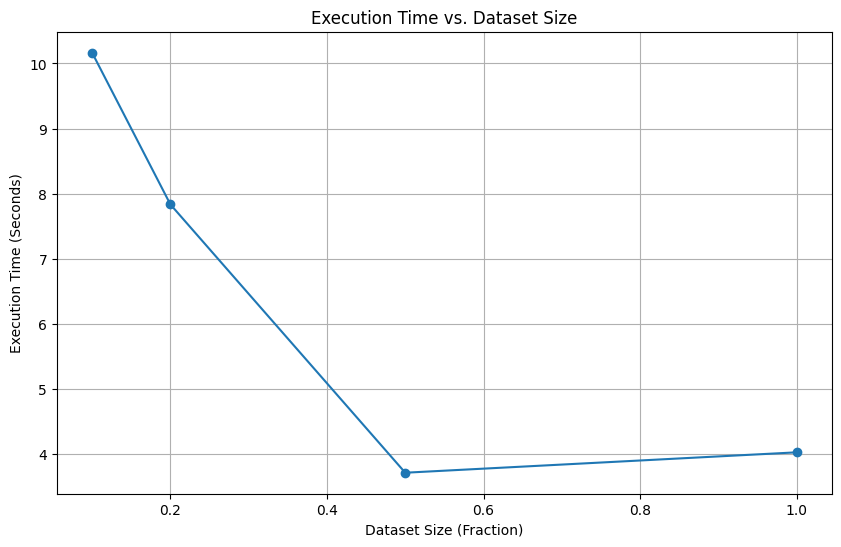

In [20]:
# Graph 1: Execution Time vs. Dataset Size
plt.figure(figsize=(10, 6))
plt.plot(subset_sizes, execution_times, marker="o")
plt.title("Execution Time vs. Dataset Size")
plt.xlabel("Dataset Size (Fraction)")
plt.ylabel("Execution Time (Seconds)")
plt.grid()
plt.show()

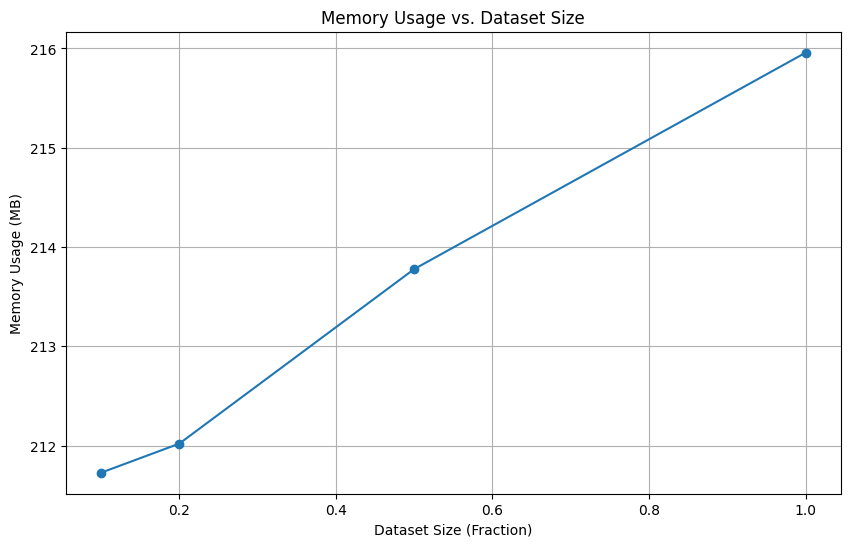

In [22]:
# Graph 3: Memory Usage vs. Dataset Size
plt.figure(figsize=(10, 6))
plt.plot(subset_sizes, memory_usages, marker="o")
plt.title("Memory Usage vs. Dataset Size")
plt.xlabel("Dataset Size (Fraction)")
plt.ylabel("Memory Usage (MB)")
plt.grid()
plt.show()

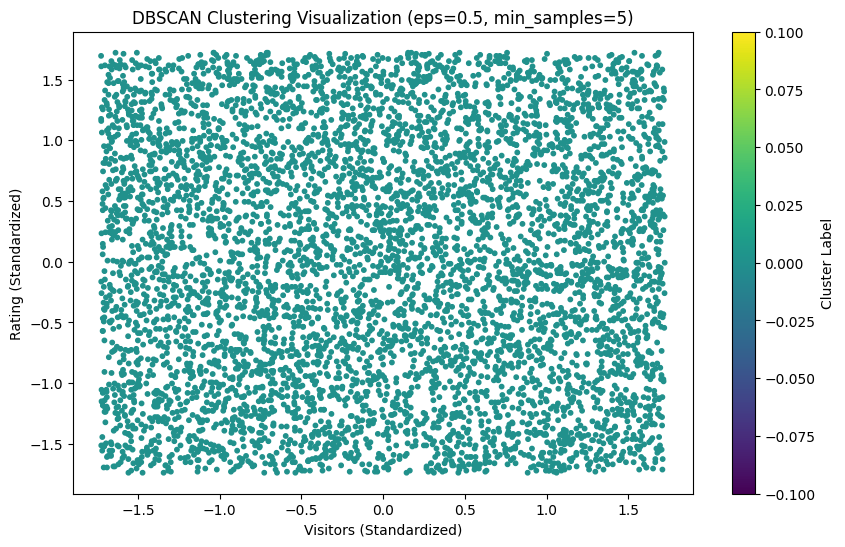

In [24]:
# Interpretability: Visualizing Clusters
plt.figure(figsize=(10, 6))

# Scatter plot of clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=10)

# Add title and labels
plt.title(f"DBSCAN Clustering Visualization (eps={eps}, min_samples={min_samples})")
plt.xlabel("Visitors (Standardized)")
plt.ylabel("Rating (Standardized)")
plt.colorbar(label="Cluster Label")  # Color bar for clusters
plt.show()

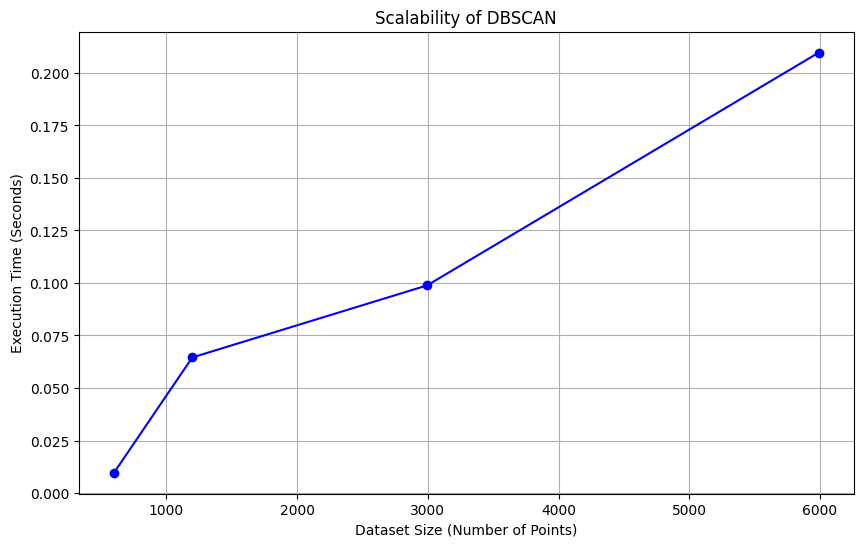

In [25]:
import matplotlib.pyplot as plt
import time
from sklearn.cluster import DBSCAN

# Parameters for DBSCAN
eps = 0.5
min_samples = 5

# Subset sizes to test scalability
subset_sizes = [0.1, 0.2, 0.5, 1.0]  # Fractions of the dataset size
execution_times = []

# Measure execution time for each subset size
X = dataset[["Visitors", "Rating", "Revenue"]].values
for fraction in subset_sizes:
    subset_size = int(len(X) * fraction)
    X_subset = X[:subset_size]
    
    start_time = time.time()
    DBSCAN(eps=eps, min_samples=min_samples).fit(X_subset)
    end_time = time.time()
    
    execution_times.append(end_time - start_time)

# Plot scalability graph
plt.figure(figsize=(10, 6))
plt.plot([len(X) * f for f in subset_sizes], execution_times, marker="o", color="b")
plt.title("Scalability of DBSCAN")
plt.xlabel("Dataset Size (Number of Points)")
plt.ylabel("Execution Time (Seconds)")
plt.grid()
plt.show()


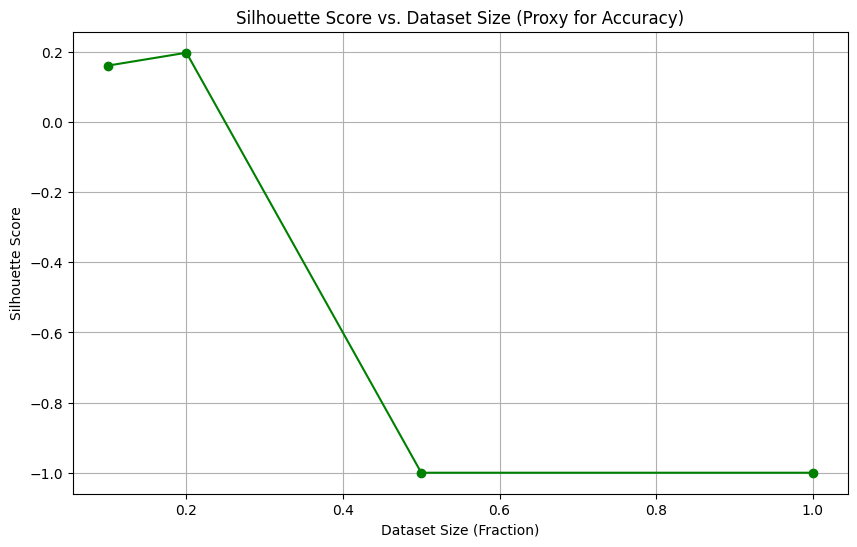

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Parameters for DBSCAN
eps = 0.5
min_samples = 5

# Subset sizes to test silhouette score
subset_sizes = [0.1, 0.2, 0.5, 1.0]  # Fractions of the dataset size
silhouette_scores = []

# Measure silhouette score for each subset size
X = dataset[["Visitors", "Rating", "Revenue"]].values
for fraction in subset_sizes:
    subset_size = int(len(X) * fraction)
    X_subset = X[:subset_size]
    
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_subset)
    labels = db.labels_
    
    # Only calculate silhouette score if there are more than one cluster
    if len(set(labels)) > 1:  # More than 1 cluster to calculate silhouette score
        score = silhouette_score(X_subset, labels)
    else:
        score = -1  # If only one cluster is found, silhouette score is undefined
    
    silhouette_scores.append(score)

# Plot silhouette score graph
plt.figure(figsize=(10, 6))
plt.plot(subset_sizes, silhouette_scores, marker="o", color="g")
plt.title("Silhouette Score vs. Dataset Size (Proxy for Accuracy)")
plt.xlabel("Dataset Size (Fraction)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()


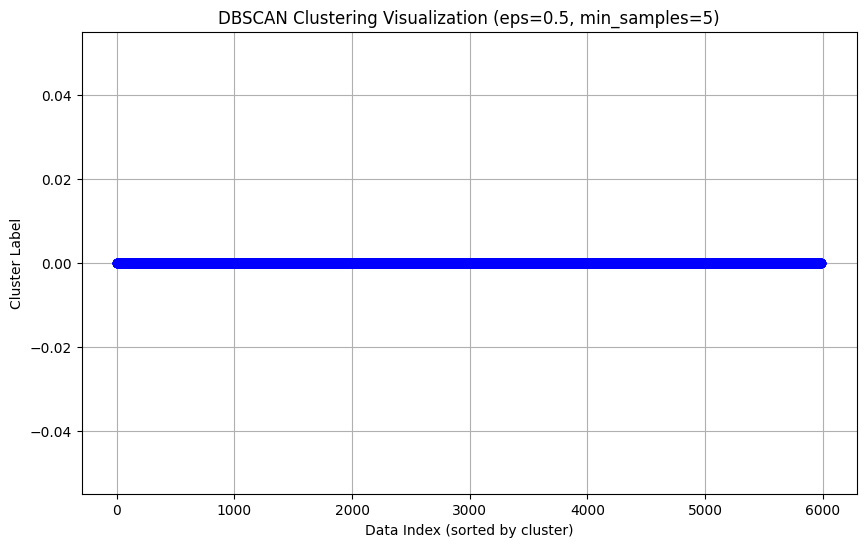

In [30]:
# Line graph of clusters
plt.figure(figsize=(10, 6))

# Sort the data by cluster label (optional)
sorted_indices = labels.argsort()  # Sort indices based on cluster labels
X_sorted = X[sorted_indices]
labels_sorted = labels[sorted_indices]

# Plot the sorted data as a line graph
plt.plot(range(len(labels_sorted)), labels_sorted, marker="o", linestyle="-", color="b")

# Add title and labels
plt.title(f"DBSCAN Clustering Visualization (eps={eps}, min_samples={min_samples})")
plt.xlabel("Data Index (sorted by cluster)")
plt.ylabel("Cluster Label")
plt.grid(True)
plt.show()
